In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore') 

#### There are nine attack types discovered in UNSW-NB15 Dataset.

1. Generic: This attack act against a cryptographical system and it tries to break the key of the security system.
2. Exploit: the intrusions which utilize the software vulnerabilities, error or glitch within the operating systems(OS) or software.
3. Fuzzers: an attack in which the attacker tries to discover security loopholes in the Operating System, program or network and make these resources suspended for some time period and can even crash them.
4. DoS: an intrusion in which attacker tries to disrupt the computing resources, by making them extremely busy in order to prevent the authorized access to the resources.
5. Reconnaissance: It can be defined as a probe; an attack that gathers information about the target computer network in order to bypass its security control.
6. Analysis: a type intrusions that penetrate the web  applications through port scanning, malicious web scripting and dispatching spam emails etc.
7. Backdoor: a technique in which attacker can bypass the usual authentication and can get unauthorized remote access to a system.
8. Shellcode: a malware attack in which the attacker penetrates a slight piece of code starting from a shell to control the compromised machine.
9. Worms: malware that replicate themselves and spread to other computers by using the network to spread the attack, depending on the security failures on the target computer which it want to access.
10. Normal : No attack

In [2]:
pd.set_option('display.max_columns',50)
df = pd.read_csv('FinalData.csv')
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,Not_used,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,NotProtected,0,1,1,0,Normal,0
1,0.649902,tcp,Not_used,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,NotProtected,0,1,6,0,Normal,0
2,1.623129,tcp,Not_used,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,NotProtected,0,2,6,0,Normal,0
3,1.681642,tcp,Others,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,PasswordProtected,0,2,1,0,Normal,0
4,0.449454,tcp,Not_used,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,NotProtected,0,2,39,0,Normal,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 42 columns):
dur                  175341 non-null float64
proto                175341 non-null object
service              175341 non-null object
state                175341 non-null object
spkts                175341 non-null int64
dpkts                175341 non-null int64
sbytes               175341 non-null int64
dbytes               175341 non-null int64
rate                 175341 non-null float64
sttl                 175341 non-null int64
dttl                 175341 non-null int64
sload                175341 non-null float64
dload                175341 non-null float64
sloss                175341 non-null int64
dloss                175341 non-null int64
sinpkt               175341 non-null float64
dinpkt               175341 non-null float64
sjit                 175341 non-null float64
djit                 175341 non-null float64
swin                 175341 non-null int64
stcpb     

In [4]:
X = df.copy()
#X = X.sample(frac = 0.20)
#X.reset_index(drop = True, inplace=True)
X.shape

(175341, 42)

In [5]:
X.label.value_counts()
#Although we can see class imbalance, but acc to the understanding of data, if we treat this imbalance, 
#we are more likely to add noise in the data which will affect the performance of the model.

1    119341
0     56000
Name: label, dtype: int64

In [6]:
X_orig = X.copy()

In [7]:
X = X.drop(['attack_cat', 'label'], axis = 1)

In [8]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto_ospf,proto_tcp,proto_udp,proto_unas,service_Others,service_dns,service_http,state_FIN,state_INT,state_Others,is_ftp_login_PasswordProtected
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,1,6,0,0,1,0,0,0,0,0,1,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,2,6,0,0,1,0,0,0,0,0,1,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,0,2,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,2,39,0,0,1,0,0,0,0,0,1,0,0,0


In [9]:
X.shape

(175341, 47)

In [10]:
sc = StandardScaler()
pca = PCA()

df_Std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

df_pca = pca.fit_transform(df_Std)
np.cumsum(pca.explained_variance_ratio_)

array([0.27999931, 0.36907852, 0.44647868, 0.51080637, 0.56329546,
       0.60916428, 0.64837907, 0.68713269, 0.72264022, 0.74991523,
       0.77574787, 0.79969095, 0.81839093, 0.8351363 , 0.85135448,
       0.86680949, 0.88152628, 0.89459053, 0.906213  , 0.91653878,
       0.92565862, 0.93371901, 0.94166635, 0.94911055, 0.95639871,
       0.9628915 , 0.96900767, 0.97438296, 0.97954089, 0.98395863,
       0.98742469, 0.98994506, 0.9922656 , 0.99442745, 0.99616432,
       0.99722721, 0.99793807, 0.99840874, 0.99881355, 0.99919293,
       0.99945616, 0.9997099 , 0.99984202, 0.99994918, 0.99998202,
       0.99999897, 1.        ])

In [11]:
pca = PCA(n_components=33)
df_pca = pd.DataFrame(pca.fit_transform(df_Std))

In [12]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters,n_init = 15)
    clusters.fit(df_pca)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,8.177288e+06
1,2,6.219344e+06
2,3,5.405083e+06
3,4,5.055661e+06
4,5,4.614810e+06
5,6,4.312693e+06
6,7,4.072365e+06
7,8,3.823552e+06
8,9,3.534211e+06
9,10,3.244001e+06


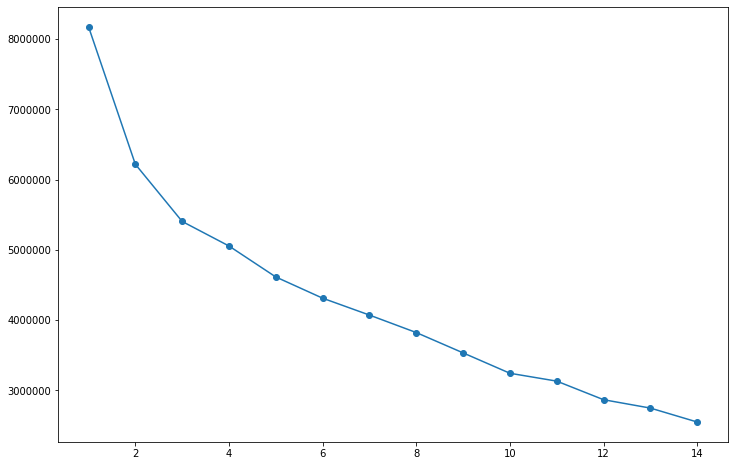

In [13]:
# Elbow plot

plt.figure(figsize=(12,8))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o' )
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)
kmeans.fit(df_pca)
centroids = kmeans.cluster_centers_

In [15]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

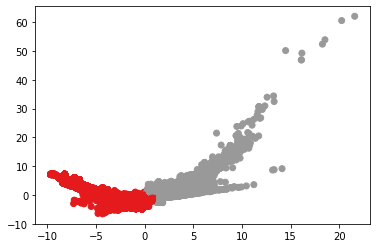

In [16]:
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],c=kmeans.labels_,cmap=plt.cm.Set1)
plt.show()

In [17]:
df_fin = X_orig.join(df_labels)
df_fin.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,labels
0,0.121478,tcp,Not_used,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,NotProtected,0,1,1,0,Normal,0,1
1,0.649902,tcp,Not_used,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,NotProtected,0,1,6,0,Normal,0,1
2,1.623129,tcp,Not_used,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,NotProtected,0,2,6,0,Normal,0,1
3,1.681642,tcp,Others,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,PasswordProtected,0,2,1,0,Normal,0,1
4,0.449454,tcp,Not_used,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,NotProtected,0,2,39,0,Normal,0,1


In [18]:
df_fin.label.value_counts()

1    119341
0     56000
Name: label, dtype: int64

In [19]:
df_fin.labels.value_counts()

0    96172
1    79169
Name: labels, dtype: int64

In [20]:
orignal_labels= list(df_fin.labels.unique())
orignal_centroids = []
for i in range(len(orignal_labels)):
    orignal_centroids.append(np.mean(df_fin[df_fin['labels']==orignal_labels[i]]))
orignal_centroids1 = np.array(orignal_centroids)
orignal_centroids_df = pd.DataFrame(orignal_centroids1, index = orignal_labels, columns=orignal_centroids[0].index)

In [21]:
orignal_centroids_df.T

,1,0
dur,1.521420e+00,1.226004e+00
spkts,4.035947e+01,3.784563e+00
dpkts,4.149913e+01,4.232209e-01
sbytes,1.865463e+04,7.694071e+02
dbytes,3.300350e+04,4.988146e+01
rate,8.623834e+02,1.732349e+05
sttl,1.312237e+02,2.193269e+02
dttl,1.713603e+02,4.080127e+00
sload,4.512214e+05,1.335501e+08
dload,1.400711e+06,7.067493e+04


In [22]:
df_fin.groupby('labels')['proto'].value_counts()

labels  proto 
0       udp       63283
        Others    17353
        unas      12084
        ospf       2595
        tcp         857
1       tcp       79089
        Others       80
Name: proto, dtype: int64

In [23]:
df_fin.groupby('labels')['service'].value_counts()

labels  service 
0       Not_used    48737
        dns         47249
        Others        186
1       Not_used    45431
        http        18724
        Others      14969
        dns            45
Name: service, dtype: int64

In [24]:
df_fin.groupby('labels')['state'].value_counts()

labels  state 
0       INT       82275
        CON       11890
        Others     2007
1       FIN       77825
        CON        1262
        Others       82
Name: state, dtype: int64

In [25]:
df_fin['label'].replace(to_replace=[0,1], value=['NoAttack','Attack'], inplace=True)
df_fin['labels'].replace(to_replace=[0,1], value=['NoAttack','Attack'], inplace=True)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(df_fin.label, df_fin.labels))

              precision    recall  f1-score   support

      Attack       0.52      0.34      0.41    119341
    NoAttack       0.18      0.32      0.23     56000

    accuracy                           0.33    175341
   macro avg       0.35      0.33      0.32    175341
weighted avg       0.41      0.33      0.35    175341



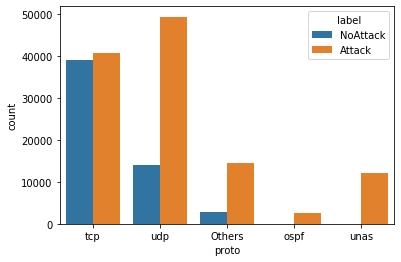

In [27]:
sns.countplot(df_fin.proto, hue=df_fin.label)
plt.show()

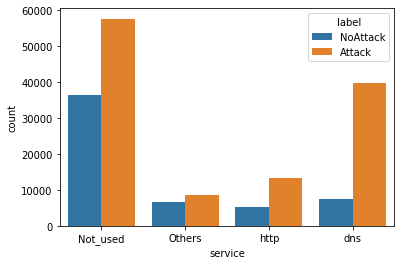

In [28]:
sns.countplot(df_fin.service, hue=df_fin.label)
plt.show()

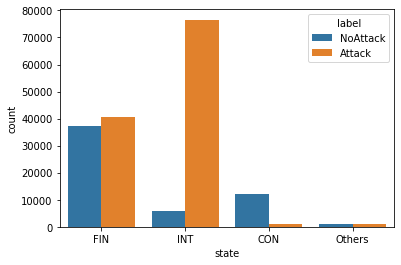

In [29]:
sns.countplot(df_fin.state, hue=df_fin.label)
plt.show()

In [30]:
kmeans1 = KMeans(n_clusters=9, n_init = 15, random_state=2)
kmeans1.fit(df_pca)
centroids = kmeans1.cluster_centers_

In [31]:
df_labels1 = pd.DataFrame(kmeans1.labels_ , columns = list(['attack_labels']))

df_labels1['attack_labels'] = df_labels1['attack_labels'].astype('category')

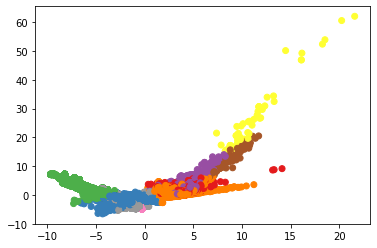

In [32]:
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],c=kmeans1.labels_,cmap=plt.cm.Set1)
plt.show()

In [33]:
df_fin = df_fin.join(df_labels1)
df_fin.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,labels,attack_labels
0,0.121478,tcp,Not_used,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,NotProtected,0,1,1,0,Normal,NoAttack,Attack,4
1,0.649902,tcp,Not_used,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,NotProtected,0,1,6,0,Normal,NoAttack,Attack,3
2,1.623129,tcp,Not_used,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,NotProtected,0,2,6,0,Normal,NoAttack,Attack,4
3,1.681642,tcp,Others,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,PasswordProtected,0,2,1,0,Normal,NoAttack,Attack,4
4,0.449454,tcp,Not_used,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,NotProtected,0,2,39,0,Normal,NoAttack,Attack,4


In [34]:
df_fin.attack_cat.value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [35]:
df_fin.attack_labels.value_counts()

1    51472
2    38229
4    34841
3    25896
0    18196
8     3811
7     2761
6       82
5       53
Name: attack_labels, dtype: int64

In [36]:
orignal_labels= list(df_fin.attack_labels.unique())
orignal_centroids = []
for i in range(len(orignal_labels)):
    orignal_centroids.append(np.mean(df_fin[df_fin['attack_labels']==orignal_labels[i]]))
orignal_centroids1 = np.array(orignal_centroids)
orignal_centroids_df = pd.DataFrame(orignal_centroids1, index = orignal_labels, columns=orignal_centroids[0].index)


In [37]:
orignal_centroids_df.T

,4,3,1,0,7,8,2,6,5
dur,1.948504e+00,8.168468e-01,3.355432e-01,1.203709e+00,3.172332,2.460008e+01,2.053129e-02,5.432863e+01,4.513862e+01
spkts,2.551081e+01,5.985515e+01,3.038254e+00,1.436854e+01,1.070264,3.380241e+01,2.039185e+00,5.587829e+03,6.526038e+02
dpkts,1.347527e+01,8.559430e+01,7.944319e-01,1.689195e+01,0.000000,8.869063e-02,5.231630e-05,8.590976e+02,4.170981e+03
sbytes,1.760616e+04,6.321600e+03,8.704266e+02,4.772656e+03,49.760232,6.769327e+03,1.448719e+02,7.428306e+06,2.835249e+04
dbytes,2.203007e+03,7.794321e+04,9.332896e+01,1.192539e+04,0.000000,4.028864e+00,4.342253e-03,3.746763e+04,5.614963e+06
rate,2.970402e+01,2.491152e+03,1.588779e+05,1.489693e+02,0.000859,3.724292e+04,2.181760e+05,1.212822e+02,1.094621e+02
sttl,2.067187e+02,3.233264e+01,2.035213e+02,1.278057e+02,0.092358,2.492005e+02,2.531298e+02,1.345854e+02,6.200000e+01
dttl,2.514234e+02,3.821432e+01,7.617384e+00,2.077613e+02,0.000000,6.832852e-01,6.591854e-03,2.520000e+02,2.520000e+02
sload,5.933659e+04,1.238436e+06,1.628137e+08,8.198382e+04,0.316270,2.172492e+07,1.145894e+08,1.118041e+06,5.145696e+03
dload,9.765580e+03,4.187942e+06,1.320509e+05,1.125038e+05,0.000000,2.693792e+01,5.500352e-01,5.622211e+03,1.019550e+06


In [38]:
print(df_fin.groupby('attack_labels')['proto'].value_counts())

attack_labels  proto 
0              tcp       18196
1              udp       24744
               Others    14643
               unas      12084
               tcp           1
2              udp       38229
3              tcp       25896
4              tcp       34825
               Others       16
5              tcp          53
6              tcp          82
7              Others     2760
               udp           1
8              ospf       2595
               tcp         893
               udp         309
               Others       14
Name: proto, dtype: int64


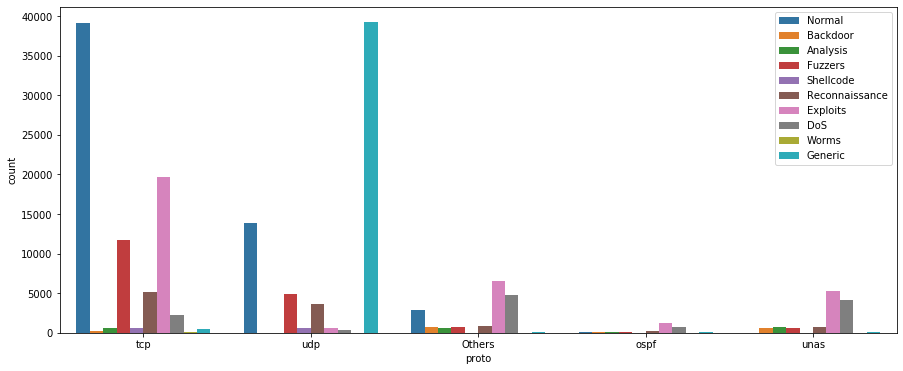

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(df_fin.proto, hue=df_fin.attack_cat)
plt.legend(loc='upper right')
plt.show()

In [40]:
print(df_fin.groupby('attack_labels')['service'].value_counts())

attack_labels  service 
0              http        18121
               Not_used       74
               Others          1
1              Not_used    41350
               dns          9936
               Others        186
2              dns         37085
               Not_used     1144
3              Not_used    18648
               Others       6783
               http          463
               dns             2
4              Not_used    26601
               Others       8093
               http          104
               dns            43
5              http           36
               Not_used       12
               Others          5
6              Others         76
               Not_used        6
7              Not_used     2761
8              Not_used     3572
               dns           228
               Others         11
Name: service, dtype: int64


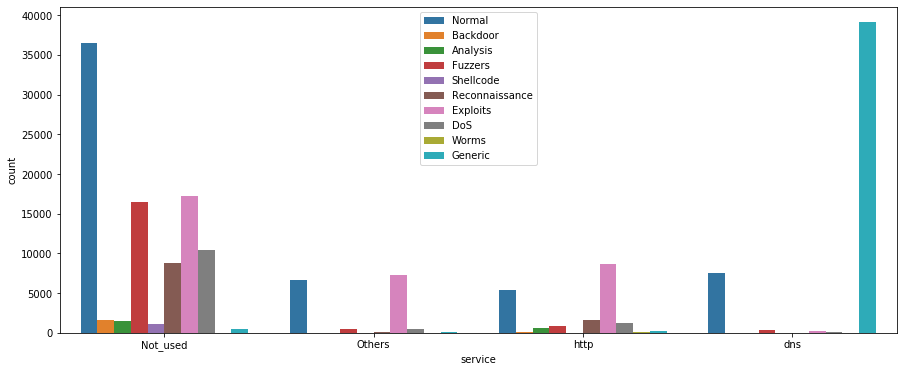

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(df_fin.service, hue=df_fin.attack_cat)
plt.legend(loc='upper center')
plt.show()

In [42]:
print(df_fin.groupby('attack_labels')['state'].value_counts())

attack_labels  state 
0              FIN       18182
               CON          11
               Others        3
1              INT       39517
               CON       11954
               Others        1
2              INT       38228
               CON           1
3              FIN       25893
               CON           3
4              FIN       33686
               CON        1112
               Others       43
5              FIN          30
               CON          23
6              CON          48
               FIN          34
7              INT        2760
               Others        1
8              Others     2041
               INT        1770
Name: state, dtype: int64


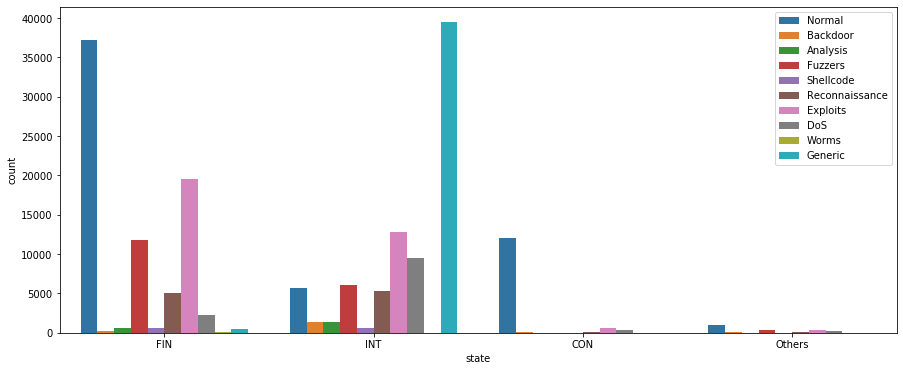

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(df_fin.state, hue=df_fin.attack_cat)
plt.legend(loc='upper right')
plt.show()

In [44]:
df_fin.shape

(175341, 44)

In [45]:
df_fin.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,labels,attack_labels
0,0.121478,tcp,Not_used,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,NotProtected,0,1,1,0,Normal,NoAttack,Attack,4
1,0.649902,tcp,Not_used,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,NotProtected,0,1,6,0,Normal,NoAttack,Attack,3
2,1.623129,tcp,Not_used,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,NotProtected,0,2,6,0,Normal,NoAttack,Attack,4
3,1.681642,tcp,Others,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,PasswordProtected,0,2,1,0,Normal,NoAttack,Attack,4
4,0.449454,tcp,Not_used,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,NotProtected,0,2,39,0,Normal,NoAttack,Attack,4


# Classification

#### On labels

In [46]:
X = df_fin.drop(['attack_cat', 'label', 'labels', 'attack_labels'], axis = 1)
X = pd.get_dummies(X, drop_first = True)
y = df_fin.label

In [47]:
df_fin.labels.value_counts()

NoAttack    96172
Attack      79169
Name: labels, dtype: int64

In [48]:
df_fin.label.value_counts()

Attack      119341
NoAttack     56000
Name: label, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state = 0, test_size = 0.30)

In [50]:
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix, classification_report

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Y_pred_rf = rf.predict(X_test)

In [52]:
print('Test Accuracy Score:  ',accuracy_score(y_test,Y_pred_rf))
print('Test Confusion Matrix', '\n',confusion_matrix(y_test,Y_pred_rf))
print('\nClassification Report', '\n', classification_report(y_test,Y_pred_rf))

Test Accuracy Score:   0.9550976180065776
Test Confusion Matrix 
 [[35198   713]
 [ 1649 15043]]

Classification Report 
               precision    recall  f1-score   support

      Attack       0.96      0.98      0.97     35911
    NoAttack       0.95      0.90      0.93     16692

    accuracy                           0.96     52603
   macro avg       0.95      0.94      0.95     52603
weighted avg       0.96      0.96      0.95     52603



In [53]:
# For PCA components we used in clustering

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(df_pca,y, random_state = 0, test_size = 0.30)

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Y_pred_rf = rf.predict(X_test)

In [56]:
print('Test Accuracy Score:  ',accuracy_score(y_test,Y_pred_rf))
print('Test Confusion Matrix', '\n',confusion_matrix(y_test,Y_pred_rf))
print('\nClassification Report', '\n', classification_report(y_test,Y_pred_rf))

Test Accuracy Score:   0.9466570347698801
Test Confusion Matrix 
 [[35148   763]
 [ 2043 14649]]

Classification Report 
               precision    recall  f1-score   support

      Attack       0.95      0.98      0.96     35911
    NoAttack       0.95      0.88      0.91     16692

    accuracy                           0.95     52603
   macro avg       0.95      0.93      0.94     52603
weighted avg       0.95      0.95      0.95     52603



In [57]:
# After selecting features using clustering feature selection

In [58]:
X = df_fin[['proto', 'state', 'service', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sloss', 'stcpb', 'dtcpb', 'is_sm_ips_ports', 'is_ftp_login', 'ct_state_ttl']]
X = pd.get_dummies(X, drop_first = True)

In [59]:
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state = 0, test_size = 0.30)

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Y_pred_rf = rf.predict(X_test)

In [61]:
print('Test Accuracy Score:  ',accuracy_score(y_test,Y_pred_rf))
print('Test Confusion Matrix', '\n',confusion_matrix(y_test,Y_pred_rf))
print('\nClassification Report', '\n', classification_report(y_test,Y_pred_rf))

Test Accuracy Score:   0.9446419405737315
Test Confusion Matrix 
 [[34962   949]
 [ 1963 14729]]

Classification Report 
               precision    recall  f1-score   support

      Attack       0.95      0.97      0.96     35911
    NoAttack       0.94      0.88      0.91     16692

    accuracy                           0.94     52603
   macro avg       0.94      0.93      0.94     52603
weighted avg       0.94      0.94      0.94     52603



#### Naive Bayes

In [62]:
X = df_fin.drop(['attack_cat', 'label', 'labels', 'attack_labels'], axis = 1)
X = pd.get_dummies(X, drop_first = True)
y = df_fin.label


X_train,X_test, y_train,y_test = train_test_split(X,y, random_state = 0, test_size = 0.30)

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nb = GaussianNB()
nb.fit(X_train,y_train)

nb_scores = cross_val_score(nb,X_train,y_train,cv = 10,scoring = 'roc_auc')
print('Average Validation Accuracy:               ',np.mean(nb_scores))
print('Standard Deviation of Validation Accuracy: ',np.std(nb_scores))

Average Validation Accuracy:                0.8675993954574237
Standard Deviation of Validation Accuracy:  0.004468769019096181


In [64]:
y_train_pred = nb.predict(X_train)
y_train_prob = nb.predict_proba(X_train)[:,1]

print('Train Accuracy Score:  ', accuracy_score(y_train,y_train_pred))
print('Train AUC Score:   ',roc_auc_score(y_train,y_train_prob))
print('Train Confusion Matrix', '\n', confusion_matrix(y_train,y_train_pred))

y_test_pred = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:,1]

print('\n')
print('Test Accuracy Score:  ',accuracy_score(y_test,y_test_pred))
print('Test AUC Score:  ',roc_auc_score(y_test,y_test_prob))
print('Test Confusion Matrix', '\n',confusion_matrix(y_test,y_test_pred))
print('\nClassification Report', '\n', classification_report(y_test,y_test_pred))

Train Accuracy Score:   0.7941957665922534
Train AUC Score:    0.8677584878715819
Train Confusion Matrix 
 [[71439 11991]
 [13269 26039]]


Test Accuracy Score:   0.796304393285554
Test AUC Score:   0.8671232816814886
Test Confusion Matrix 
 [[30944  4967]
 [ 5748 10944]]

Classification Report 
               precision    recall  f1-score   support

      Attack       0.84      0.86      0.85     35911
    NoAttack       0.69      0.66      0.67     16692

    accuracy                           0.80     52603
   macro avg       0.77      0.76      0.76     52603
weighted avg       0.79      0.80      0.79     52603

